In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from adjustText import adjust_text

In [2]:
from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer

In [3]:
league_df = LeagueHustleStatsPlayer(per_mode_time='PerGame').get_data_frames()[0]

In [4]:
league_df

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,G,MIN,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,...,PCT_LOOSE_BALLS_RECOVERED_DEF,OFF_BOXOUTS,DEF_BOXOUTS,BOX_OUTS,BOX_OUT_PLAYER_TEAM_REBS,BOX_OUT_PLAYER_REBS,PCT_BOX_OUTS_OFF,PCT_BOX_OUTS_DEF,PCT_BOX_OUTS_TEAM_REB,PCT_BOX_OUTS_REB
0,203932,Aaron Gordon,1610612743,DEN,25.0,50,27.7,3.78,2.46,1.32,...,0.344,0.20,0.18,0.38,0.34,0.30,0.526,0.474,0.944,0.833
1,1628988,Aaron Holiday,1610612754,IND,24.0,66,17.8,3.09,1.29,1.80,...,0.577,0.02,0.41,0.42,0.33,0.02,0.036,0.964,0.880,0.040
2,1630174,Aaron Nesmith,1610612738,BOS,21.0,46,14.5,2.87,1.83,1.04,...,0.423,0.07,0.39,0.46,0.43,0.26,0.143,0.857,1.000,0.600
3,1627846,Abdel Nader,1610612756,PHX,27.0,24,14.8,3.17,1.92,1.25,...,0.556,0.04,0.46,0.50,0.42,0.17,0.083,0.917,1.000,0.400
4,1629690,Adam Mokoka,1610612741,CHI,22.0,14,4.0,0.29,0.21,0.07,...,0.000,0.00,0.21,0.21,0.14,0.00,0.000,1.000,1.000,0.000
5,201143,Al Horford,1610612738,BOS,35.0,28,27.9,8.82,6.93,1.89,...,0.500,0.11,2.18,2.29,2.00,1.04,0.047,0.953,0.966,0.500
6,202329,Al-Farouq Aminu,1610612741,CHI,30.0,23,18.9,4.00,1.87,2.13,...,0.571,0.04,0.48,0.52,0.52,0.43,0.083,0.917,1.000,0.833
7,202692,Alec Burks,1610612752,NYK,29.0,49,25.6,4.84,2.27,2.57,...,0.500,0.02,0.10,0.12,0.10,0.04,0.167,0.833,1.000,0.400
8,1630197,Aleksej Pokusevski,1610612760,OKC,19.0,45,24.2,6.69,3.80,2.89,...,0.500,0.00,0.24,0.24,0.20,0.07,0.000,1.000,0.900,0.300
9,1629346,Alen Smailagic,1610612744,GSW,20.0,15,5.6,2.07,1.67,0.40,...,1.000,0.13,0.40,0.53,0.47,0.27,0.250,0.750,1.000,0.571


In [5]:
league_df = league_df.loc[(league_df.G > 7) & (league_df.MIN > 15)]

In [6]:
plt.style.use('fivethirtyeight')

In [7]:
top_deflections = league_df.sort_values(by='DEFLECTIONS', ascending=False).iloc[:7]
top_contested = league_df.sort_values(by='CONTESTED_SHOTS', ascending=False).iloc[:7]
other = top_contested.PLAYER_ID.tolist() + top_deflections.PLAYER_ID.tolist()
other = league_df.loc[~league_df.PLAYER_ID.isin(other)]

In [8]:
top_performers = pd.concat([top_deflections, top_contested])

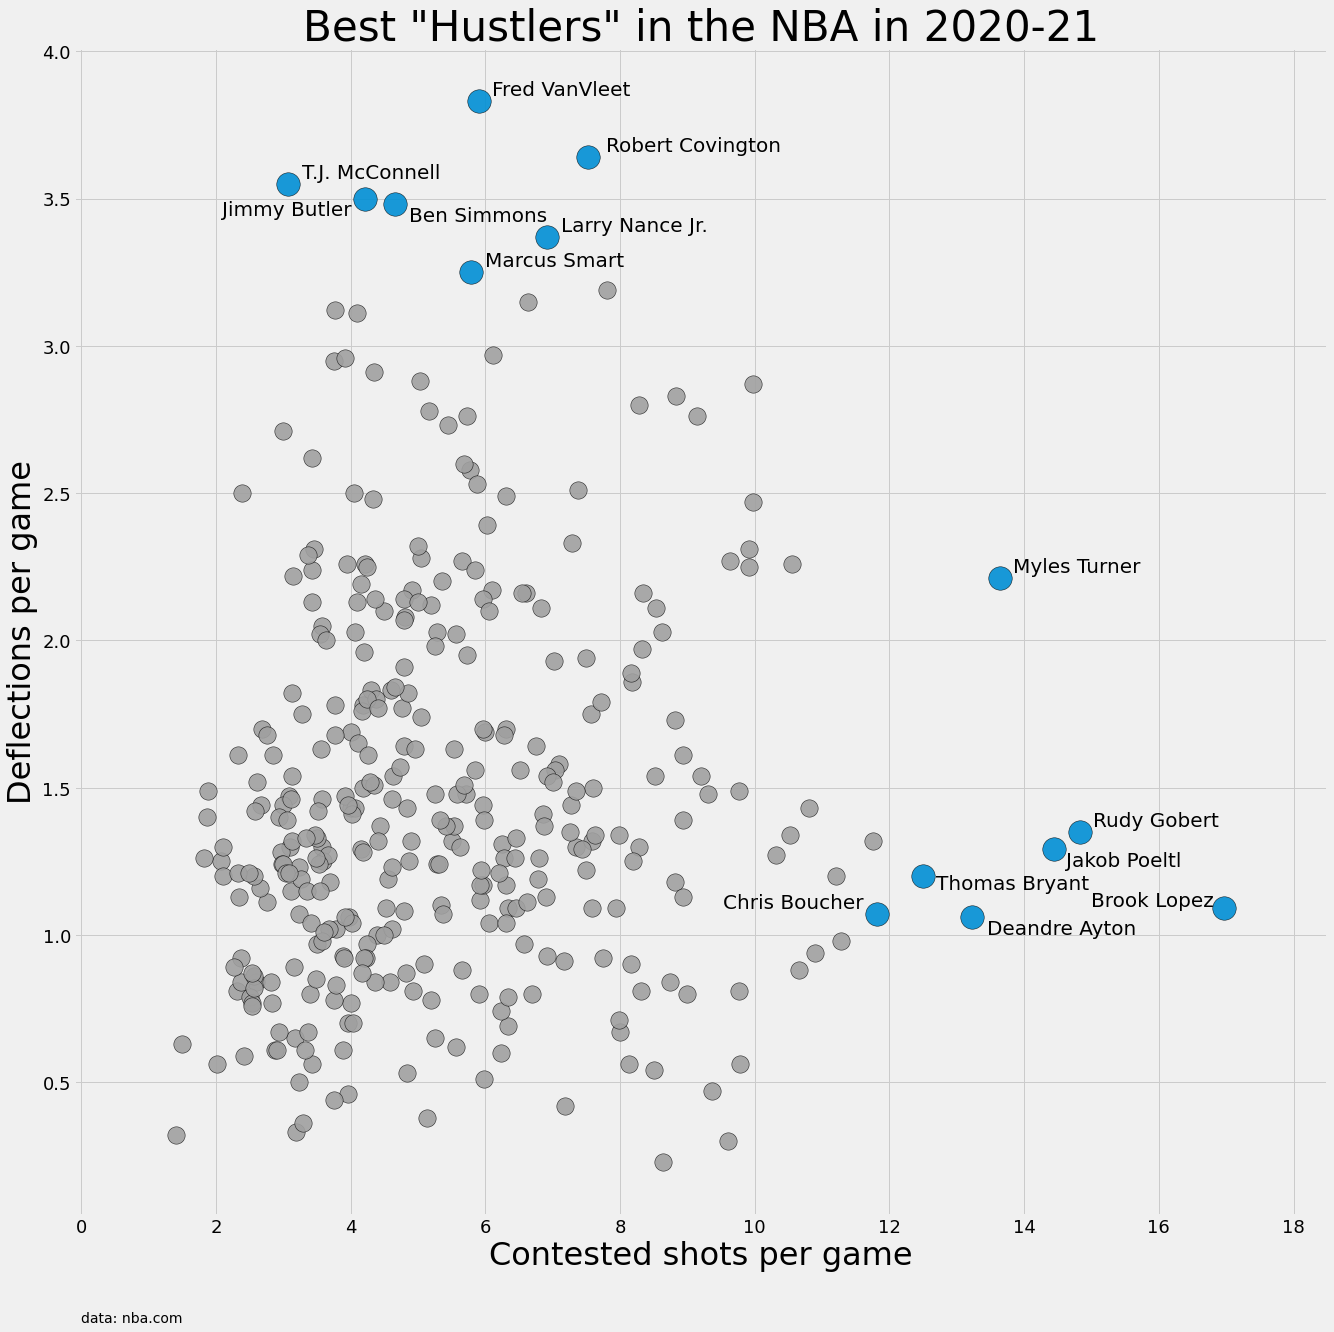

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=other.CONTESTED_SHOTS, y=other.DEFLECTIONS, s=300, edgecolors='black', alpha=0.9, color='#A0A0A0')
ax.scatter(x=top_performers.CONTESTED_SHOTS, y=top_performers.DEFLECTIONS, s=550, edgecolors='black', alpha=0.9)
ax.set_xlim(-0.1, 18.5)
ax.set_xticks(range(0, 19, 2))

texts = []
for i in range(len(top_performers)):
    item = top_performers.iloc[i]
    texts.append(ax.text(x=item.CONTESTED_SHOTS, y=item.DEFLECTIONS, s=item.PLAYER_NAME, fontsize=20))
    
ax.text(x=0, y=-0.3, s='data: nba.com', size=14, va='center', ha='left')
adjust_text(texts, expand_points=(1.2, 1.2))
ax.set_title('Best "Hustlers" in the NBA in 2020-21', size=42)
ax.set_xlabel("Contested shots per game", size=32)
ax.set_ylabel("Deflections per game", size=32)
ax.tick_params(labelsize=18)

### bballytics colors

In [10]:
bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'

In [11]:
def use_bballytics_colors(fig, ax):
    bball_gray = '#312f30'
    bball_white = '#dddee0'
    bball_orange = '#f87c24'
    bball_light_orange = '#fbaf7b'
    
    ax.set_facecolor(bball_gray)
    fig.set_facecolor(bball_gray)
    ax.set_frame_on(False)
    ax.grid(alpha=0.3)

In [12]:
good_colors = [
    "#003f5c",
    "#2f4b7c",
    "#665191",
    "#a05195",
    "#d45087",
    "#f95d6a",
    "#ff7c43",
    "#ffa600"
]

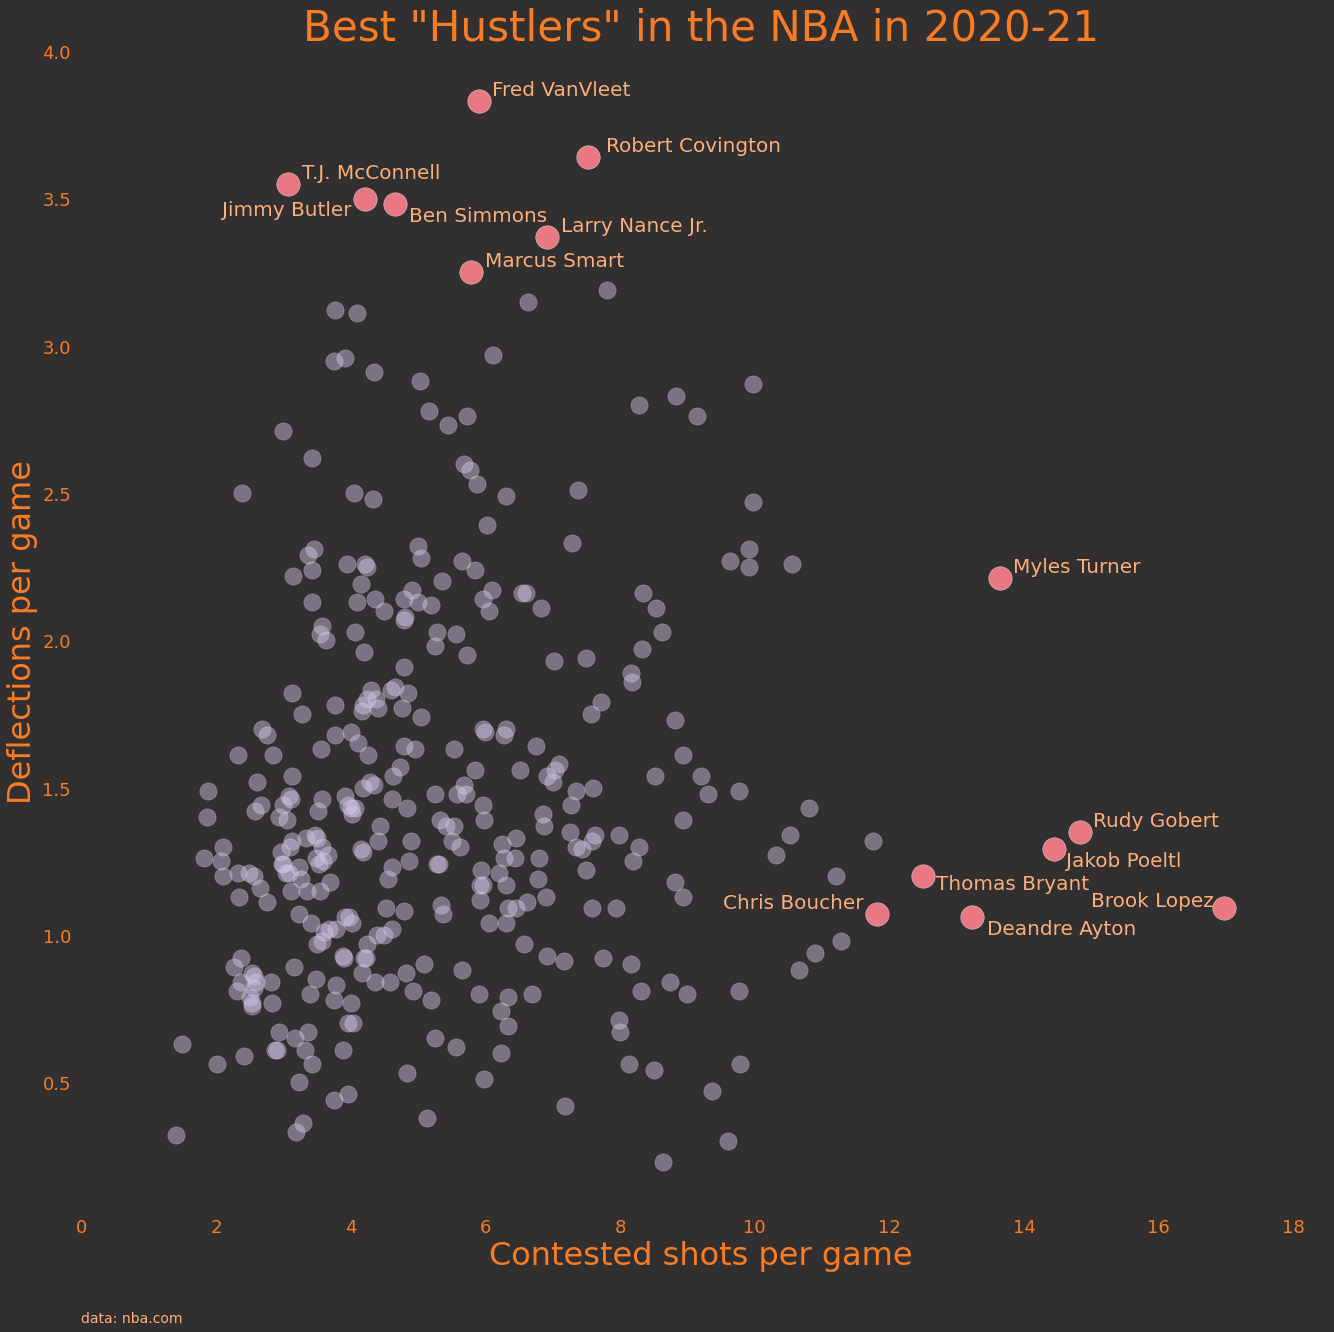

In [13]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=other.CONTESTED_SHOTS, y=other.DEFLECTIONS, s=300, edgecolors=bball_white, alpha=0.45, color="#d7c7ec")
ax.scatter(x=top_performers.CONTESTED_SHOTS, y=top_performers.DEFLECTIONS, s=550, color="#ff818c", edgecolors=bball_white, alpha=0.9)
ax.set_xlim(-0.1, 18.5)
ax.set_xticks(range(0, 19, 2))

texts = []
for i in range(len(top_performers)):
    item = top_performers.iloc[i]
    texts.append(ax.text(x=item.CONTESTED_SHOTS, y=item.DEFLECTIONS, s=item.PLAYER_NAME, fontsize=20, color=bball_light_orange))

ax.set_facecolor(bball_gray)
fig.set_facecolor(bball_gray)
ax.set_frame_on(False)
ax.grid(alpha=0.3)

ax.text(x=0, y=-0.3, s='data: nba.com', size=14, va='center', ha='left', color=bball_light_orange)
adjust_text(texts, expand_points=(1.2, 1.2))
ax.set_title('Best "Hustlers" in the NBA in 2020-21', size=42, color=bball_orange)
ax.set_xlabel("Contested shots per game", size=32, color=bball_orange)
ax.set_ylabel("Deflections per game", size=32, color=bball_orange)
ax.tick_params(labelsize=18, labelcolor=bball_orange)